In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Q1 and Q2

In [2]:
df = pd.read_csv('cleaned_merged_heart_dataset.csv')
df.head()  # Display the first few rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


check for missing value

In [3]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
print(df.duplicated().sum())
df = df.drop_duplicates()


1286


In [5]:

df = pd.get_dummies(df, drop_first=True)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


summary statistics

In [7]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,602.000000,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,602.000000,6.020000e+02
mean,1.283580e-16,-3.393373e-17,4.721214e-17,1.799963e-16,-2.301592e-16,-4.426138e-18,0.000000,2.124546e-16,5.901518e-18,-5.311366e-17,-5.901518e-17,8.262125e-17,0.000000,-1.534395e-16
std,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832,1.000832e+00
min,-2.820332e+00,-1.472556e+00,-1.320787e+00,-2.151398e+00,-2.377237e+00,-4.219979e-01,-0.916855,-3.387872e+00,-7.132825e-01,-9.289619e-01,-2.362915e+00,-7.205987e-01,-1.855090,-9.705336e-01
25%,-7.167156e-01,-1.472556e+00,-1.320787e+00,-6.652261e-01,-7.076403e-01,-4.219979e-01,-0.916855,-7.475478e-01,-7.132825e-01,-9.289619e-01,-7.592230e-01,-7.205987e-01,-0.759686,-9.705336e-01
50%,5.830096e-02,6.790913e-01,2.572235e-02,-9.362159e-02,-8.639513e-02,-4.219979e-01,0.315169,1.397743e-01,-7.132825e-01,-2.365179e-01,-7.592230e-01,-7.205987e-01,-0.211984,-9.705336e-01
75%,7.226009e-01,6.790913e-01,6.989770e-01,4.779829e-01,5.494104e-01,-4.219979e-01,0.315169,7.132873e-01,1.401969e+00,6.290370e-01,8.444690e-01,2.977121e-01,-0.211984,1.030361e+00
max,2.494067e+00,6.790913e-01,1.372232e+00,3.907610e+00,6.126056e+00,2.369680e+00,1.547194,2.282332e+00,1.401969e+00,4.437479e+00,2.448161e+00,3.352645e+00,1.978823,1.030361e+00


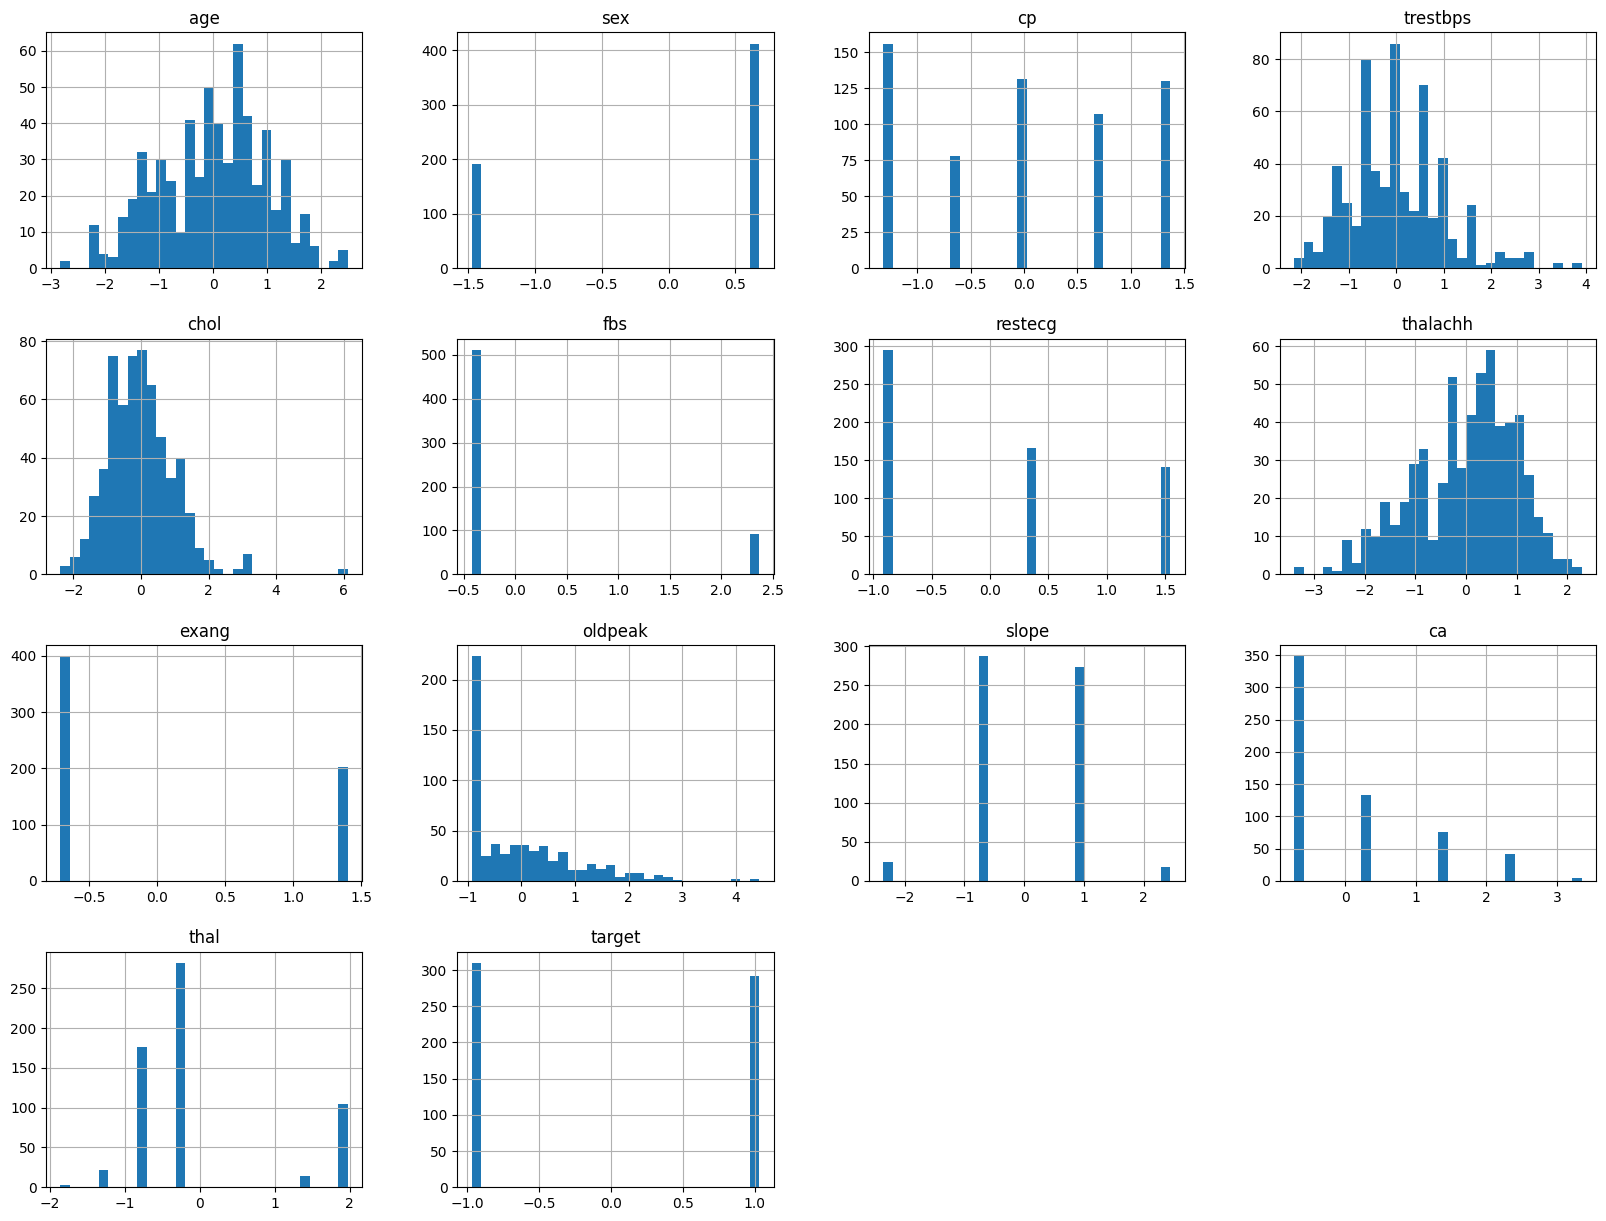

In [8]:
df.hist(bins=30, figsize=(20, 15))
plt.show()


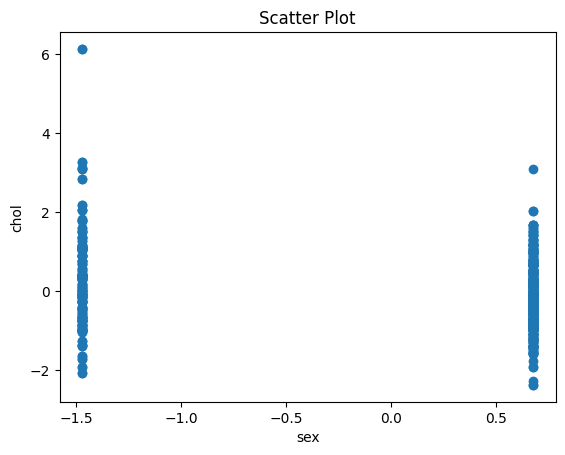

In [12]:
# Example: Scatter plot of two features
plt.scatter(df['sex'], df['chol'])
plt.xlabel('sex')
plt.ylabel('chol')
plt.title('Scatter Plot')
plt.show()


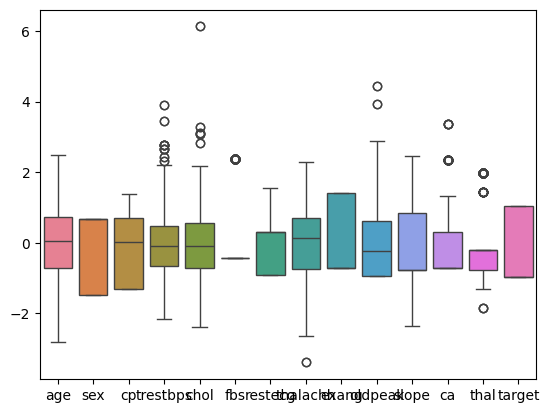

In [13]:
sns.boxplot(data=df)
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
X = df.drop('fbs', axis=1)  # Features
y = df['fbs']  # Target variable
X


,age,sex,cp,trestbps,chol,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,0.944034,0.679091,0.698977,0.763785,-0.299948,-0.916855,0.031564,-0.713283,1.061815,-2.362915,-0.720599,-1.307388,1.030361
1,-1.934599,0.679091,0.025722,-0.093622,0.030088,0.315169,1.633072,-0.713283,2.100480,-2.362915,-0.720599,-0.759686,1.030361
2,-1.491732,-1.472556,-0.647532,-0.093622,-0.862952,-0.916855,0.983812,-0.713283,0.282815,0.844469,-0.720599,-0.759686,1.030361
3,0.169018,0.679091,-0.647532,-0.665226,-0.241706,0.315169,1.243516,-0.713283,-0.236518,0.844469,-0.720599,-0.759686,1.030361
4,0.279734,-1.472556,-1.320787,-0.665226,2.049135,0.315169,0.594256,1.401969,-0.409629,0.844469,-0.720599,-0.759686,1.030361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.058301,0.679091,-0.647532,-0.436584,0.243641,0.315169,-0.357992,-0.713283,-0.669295,0.844469,-0.720599,-0.211984,-0.970534
1880,-0.495282,0.679091,-1.320787,-0.207942,-0.862952,0.315169,0.291268,1.401969,-0.063407,-0.759223,-0.720599,-1.855090,-0.970534
1883,0.611884,0.679091,-1.320787,0.477983,-0.804710,-0.916855,-0.487844,1.401969,0.715593,0.844469,0.297712,-0.211984,-0.970534
1886,-0.052416,0.679091,-0.647532,1.278229,-0.319362,-0.916855,0.637540,-0.713283,-0.928962,0.844469,0.297712,-0.759686,-0.970534


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(y_train.unique())



[-0.42199786  2.36968028]


Q3 and Q4

In [31]:
df = pd.read_csv('cleaned_merged_heart_dataset.csv')
df.head()  # Display the first few rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


BINARY LOGISTIC REGRESSION

In [33]:
X = df.drop('fbs', axis=1)  # Features
y = df['fbs']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the logistic regression model to the training data
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [36]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model's performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       318
           1       0.00      0.00      0.00        60

    accuracy                           0.84       378
   macro avg       0.42      0.50      0.46       378
weighted avg       0.71      0.84      0.77       378

Accuracy Score: 0.8386243386243386


decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [38]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9761904761904762
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       318
           1       0.88      0.98      0.93        60

    accuracy                           0.98       378
   macro avg       0.94      0.98      0.96       378
weighted avg       0.98      0.98      0.98       378

Confusion Matrix:
 [[310   8]
 [  1  59]]


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Make predictions
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[318   0]
 [  5  55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       318
           1       1.00      0.92      0.96        60

    accuracy                           0.99       378
   macro avg       0.99      0.96      0.97       378
weighted avg       0.99      0.99      0.99       378


Accuracy Score: 0.9867724867724867


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

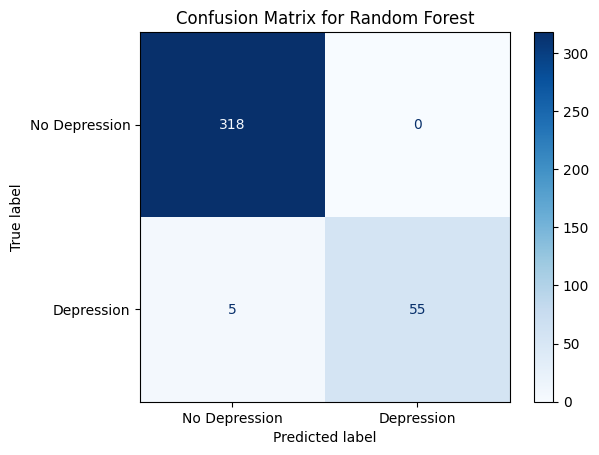

In [43]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Depression', 'Depression'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")

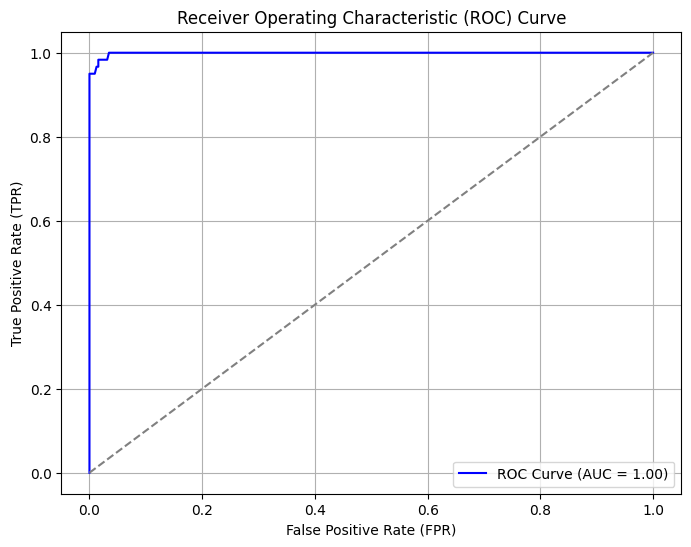

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

